# Distributions

## Probability Density Function
- Probability Distribution Density Function
    - Probabiliy of $x$ being between $a$ and $b$ for any $(a,b)$ is $\displaystyle P(a<x<b) = \int_a^b p(x)\,dx$
- PDF always $\displaystyle  \int_{-\infty}^{\infty} p(x)\,dx = 1$
- Example 1: uniform distribution on $(a,b)$
    - $\displaystyle  U(x;a,b) = \frac{\pmb{I}_{ab}(x)}{b\!-\!a} $,
    - where $\pmb{I}_{ab}(x)$ is 1 between $a$ and $b$, but 0 otherwise
- Example 2: Gaussian or normal distribution
    - $\displaystyle  G\left(x;\mu,\sigma^2\right) = \frac{{1}}{\sqrt{2\pi\sigma^2}}\ \exp\left[{-\frac{(x\!-\!\mu)^2}{2 \sigma^2} }\right]$

## Cumulative Distribution Function
- Integral up to a given $x$: prob of being less than $x$: $\displaystyle \mathrm{CDF}(x) = \int_{-\infty}^{x} p(t)\,dt$

(np.float64(-1.0), np.float64(1.0))

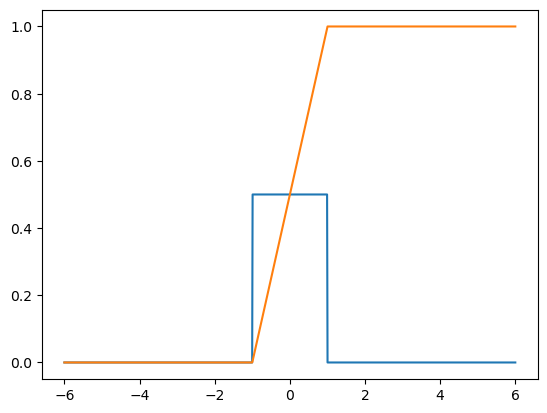

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import uniform

a, b = -1, 1 
u = uniform(a, b-a)
x = np.linspace(-6, 6, 1000) #(min, max, step)
plt.plot(x, u.pdf(x))
plt.plot(x, u.cdf(x))

u.support() # our bounds a to b

(np.float64(-inf), np.float64(inf))

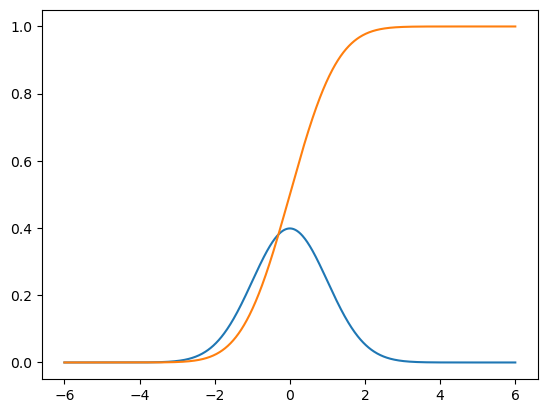

In [2]:
from scipy.stats import norm as gaussian

g = gaussian(0, 1)
plt.plot(x, g.pdf(x));
plt.plot(x, g.cdf(x));

g.support()

### Characterization of PDFs
- Expectation value of $X$: $\displaystyle \mu = \mathbb{E}[X] = \int_{-\infty}^{\infty}\! x\ p(x)\,dx$
- Expectation value of any $f(X)$: $\displaystyle \mathbb{E}[f(X)] = \int_{-\infty}^{\infty}\! f(x)\,p(x)\,dx$
- Moments: $\displaystyle \mathbb{E}[X^k]$
    - 1st moment (mean): $\displaystyle \mathbb{E}\big[(X\!-\!\mu)^k\big]$
    - 2nd moment (variance): $\displaystyle \mathbb{Var}[X] = \mathbb{E}\big[(X\!-\!\mu)^2\big]$
        - Standard deviation: $\displaystyle \sigma = \sqrt{\mathbb{Var}[X]}$
    - Normalized moments: $\displaystyle \mathbb{E}\left[\left(\frac{X\!-\!\mu}{\sigma}\right)^k\right]$
        - Skewness: 3rd normalized moment ($k$=3)
        - Kurtosis: 4th normalized moment ($k$=4)

In [4]:
# Mean, Variance, Skew, Kurtosis
print("Gaussian Moments:", g.stats(moments='mvsk'))
print("Uniform Moments:", u.stats(moments='mvsk'))

Gaussian Moments: (np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0))
Uniform Moments: (np.float64(0.0), np.float64(0.3333333333333333), np.float64(0.0), np.float64(-1.2))


# Python Introduction
- useful concepts: tuple, list, function, class, for, map,  lambda, import (for numpy, matplotlib)

In [6]:
# Tuple
tup = ('x1','asdf')
print(tup)

('x1', 'asdf')


In [11]:
# list
L = [1, 2, 3, 4, 5]

# numpy array
a = np.array([L, L], dtype=np.float64)
print(a.shape, "\n",a)

(2, 5) 
 [[1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]]


In [12]:
# Function
def f(x, k=2):
    return x**k

f3 = f(3)
print(f3)
f(2), f(2,2), f(2,3), f(2,k=4), f3

9


(4, 4, 8, 16, 9)

In [14]:
import math

# object-oriented programming for a clanker
class Robot(object):
    
    def __init__(self, name, x=0, y=0, angle=0):
        self.name, self.x, self.y, self.angle = name, x, y, angle
        self.path = [(x,y)]
    
    def move(self, l=1):
        self.x += l * math.cos(self.angle)
        self.y += l * math.sin(self.angle)
        self.path.append((self.x, self.y))
        
    def left(self, a=math.pi/2):
        self.angle += a
        
    def right(self, a=math.pi/2):
        self.left(-a)

In [15]:
r = Robot('R2D2')
r.move()    # by 1 unit
r.left()    # 90 degrees
r.move(0.2)
r.left()
r.move(0.4)
r.right(np.pi/4)
r.move()

In [16]:
r.path # complete history

[(0, 0),
 (1.0, 0.0),
 (1.0, 0.2),
 (0.6, 0.20000000000000007),
 (-0.10710678118654748, 0.9071067811865476)]

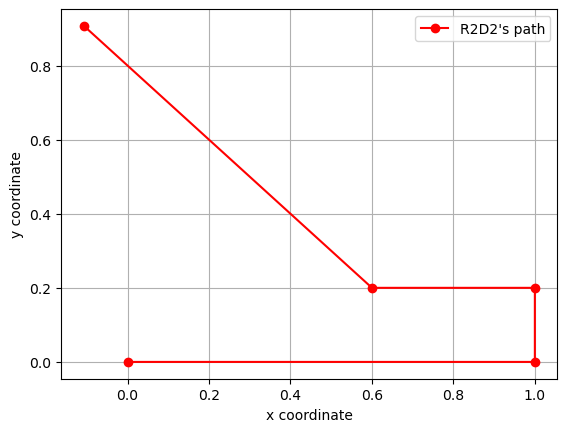

In [18]:
plt.plot(x, y, 'ro-', label=f"{r.name}'s path")
plt.legend()
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.grid()
plt.savefig('robot.png', dpi=200)
plt.savefig('robot.pdf')

In [19]:
# lambda expressions
g = lambda x: x*x
g(2)

4

In [15]:
import math
import numpy as np

# using standard math 
print(math.pi, math.sin(1.57),"\n")

#using numpy math
print(np.pi, np.sin(1.57))

3.141592653589793 0.9999996829318346 

3.141592653589793 0.9999996829318346


In [18]:
# arrays are tensors: vectors and matrices
import numpy as np

l = [1, 2, 3]
a = np.array([l, l], dtype=np.int32)
print(a.shape, "\n\n", a, "\n\n", a.T) # T for transpose

(2, 3) 

 [[1 2 3]
 [1 2 3]] 

 [[1 1]
 [2 2]
 [3 3]]


In [25]:
print("element-wise multiplication:\n", a * a) 
b = a.T.dot(a) 
print("dot product of a and its transpose:\n", b)
print("direct matrix multiplication:\n", a.T @ a) 

element-wise multiplication:
 [[1 4 9]
 [1 4 9]]
dot product of a and its transpose:
 [[ 2  4  6]
 [ 4  8 12]
 [ 6 12 18]]
direct matrix multiplication:
 [[ 2  4  6]
 [ 4  8 12]
 [ 6 12 18]]


In [26]:
# slicing arrays
print(b)
print("\n")
print("x11 and x22:\n", b[:2,1:-1])

[[ 2  4  6]
 [ 4  8 12]
 [ 6 12 18]]


x11 and x22:
 [[4]
 [8]]


In [28]:
print('Values strictly less than 5:\n', b < 5)
print('the values:', b[b<5])

Values strictly less than 5:
 [[ True  True False]
 [ True False False]
 [False False False]]
the values: [2 4 4]


## Pandas for Data Management

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    "name": ["Alice", "Bob", "Charlie", "Dana", "Evan", None],
    "age": [25, 32, np.nan, 45, 29, 38],
    "income": [50000, 60000, 55000, None, 72000, 65000],
    "city": ["NY", "LA", "NY", "CHI", None, "LA"],
    "signup_date": ["2024-01-01", "2024-01-05", "2024-02-01", None, "2024-02-15", "2024-03-01"]
})

In [2]:
# Convert date column
df["signup_date"] = pd.to_datetime(df["signup_date"])

print("\n--- Basic Inspection ---")
print(df.head())
print(df.info())
print(df.describe(include="all"))


--- Basic Inspection ---
      name   age   income  city signup_date
0    Alice  25.0  50000.0    NY  2024-01-01
1      Bob  32.0  60000.0    LA  2024-01-05
2  Charlie   NaN  55000.0    NY  2024-02-01
3     Dana  45.0      NaN   CHI         NaT
4     Evan  29.0  72000.0  None  2024-02-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         5 non-null      object        
 1   age          5 non-null      float64       
 2   income       5 non-null      float64       
 3   city         5 non-null      object        
 4   signup_date  5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 372.0+ bytes
None
         name        age        income city          signup_date
count       5   5.000000      5.000000    5                    5
unique      5        NaN           NaN    3             

In [3]:
# Missing data handling
print("\n--- Missing Values ---")
print(df.isna().sum())

# Fill numeric with median
df["age"] = df["age"].fillna(df["age"].median())
df["income"] = df["income"].fillna(df["income"].median())

# Fill categorical with mode
df["city"] = df["city"].fillna(df["city"].mode()[0])
df["name"] = df["name"].fillna("Unknown")

# Fill dates with forward-fill
df["signup_date"] = df["signup_date"].fillna(method="ffill")

print("\n--- After Filling Missing Values ---")
print(df)


--- Missing Values ---
name           1
age            1
income         1
city           1
signup_date    1
dtype: int64

--- After Filling Missing Values ---
      name   age   income city signup_date
0    Alice  25.0  50000.0   NY  2024-01-01
1      Bob  32.0  60000.0   LA  2024-01-05
2  Charlie  32.0  55000.0   NY  2024-02-01
3     Dana  45.0  60000.0  CHI  2024-02-01
4     Evan  29.0  72000.0   LA  2024-02-15
5  Unknown  38.0  65000.0   LA  2024-03-01


/var/folders/38/22n3rn6s7gjdhyf__np8757r0000gn/T/ipykernel_23536/2646784545.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["signup_date"] = df["signup_date"].fillna(method="ffill")


In [4]:
# Helpful inspection utilities
print("\n--- Value Counts ---")
print(df["city"].value_counts())

print("\n--- Unique Values ---")
print(df.nunique())

print("\n--- Correlation Matrix ---")
print(df.corr(numeric_only=True))

print("\n--- Detect Outliers (Z-score > 3) ---")
z_scores = (df.select_dtypes(include=[np.number]) - df.select_dtypes(include=[np.number]).mean()) / df.select_dtypes(include=[np.number]).std()
print((np.abs(z_scores) > 3).sum())


--- Value Counts ---
city
LA     3
NY     2
CHI    1
Name: count, dtype: int64

--- Unique Values ---
name           6
age            5
income         5
city           3
signup_date    5
dtype: int64

--- Correlation Matrix ---
             age    income
age     1.000000  0.225483
income  0.225483  1.000000

--- Detect Outliers (Z-score > 3) ---
age       0
income    0
dtype: int64


In [5]:
# Feature engineering
df["income_per_age"] = df["income"] / df["age"]
df["signup_month"] = df["signup_date"].dt.month

print("\n--- After Feature Engineering ---")
print(df.head())


--- After Feature Engineering ---
      name   age   income city signup_date  income_per_age  signup_month
0    Alice  25.0  50000.0   NY  2024-01-01     2000.000000             1
1      Bob  32.0  60000.0   LA  2024-01-05     1875.000000             1
2  Charlie  32.0  55000.0   NY  2024-02-01     1718.750000             2
3     Dana  45.0  60000.0  CHI  2024-02-01     1333.333333             2
4     Evan  29.0  72000.0   LA  2024-02-15     2482.758621             2


In [6]:
# Useful filtering examples
high_income = df[df["income"] > 60000]
ny_people = df[df["city"] == "NY"]
age_between = df[df["age"].between(30, 40)]

print("\n--- High Income ---")
print(high_income)

print("\n--- People in NY ---")
print(ny_people)

print("\n--- Age 30–40 ---")
print(age_between)


--- High Income ---
      name   age   income city signup_date  income_per_age  signup_month
4     Evan  29.0  72000.0   LA  2024-02-15     2482.758621             2
5  Unknown  38.0  65000.0   LA  2024-03-01     1710.526316             3

--- People in NY ---
      name   age   income city signup_date  income_per_age  signup_month
0    Alice  25.0  50000.0   NY  2024-01-01         2000.00             1
2  Charlie  32.0  55000.0   NY  2024-02-01         1718.75             2

--- Age 30–40 ---
      name   age   income city signup_date  income_per_age  signup_month
1      Bob  32.0  60000.0   LA  2024-01-05     1875.000000             1
2  Charlie  32.0  55000.0   NY  2024-02-01     1718.750000             2
5  Unknown  38.0  65000.0   LA  2024-03-01     1710.526316             3


In [7]:
# Grouping & aggregation
print("\n--- Grouped Summary by City ---")
print(df.groupby("city").agg({
    "income": ["mean", "median", "count"],
    "age": ["mean", "min", "max"]
}))


--- Grouped Summary by City ---
            income                  age            
              mean   median count  mean   min   max
city                                               
CHI   60000.000000  60000.0     1  45.0  45.0  45.0
LA    65666.666667  65000.0     3  33.0  29.0  38.0
NY    52500.000000  52500.0     2  28.5  25.0  32.0


## Seaborn for Statistics

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset
penguins = sns.load_dataset("penguins")

# Basic inspection
print(penguins.head())
print(penguins.info())
print(penguins.describe(include="all"))

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_

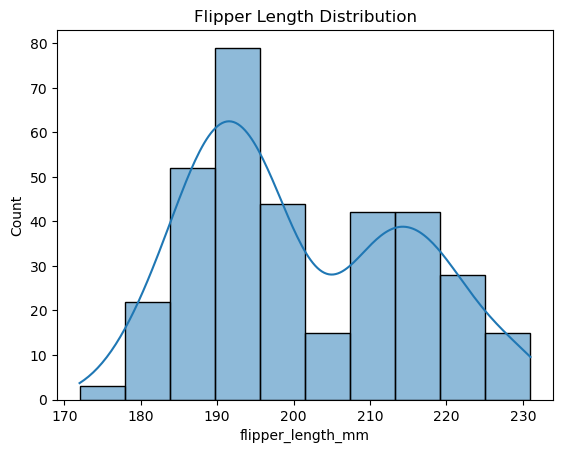

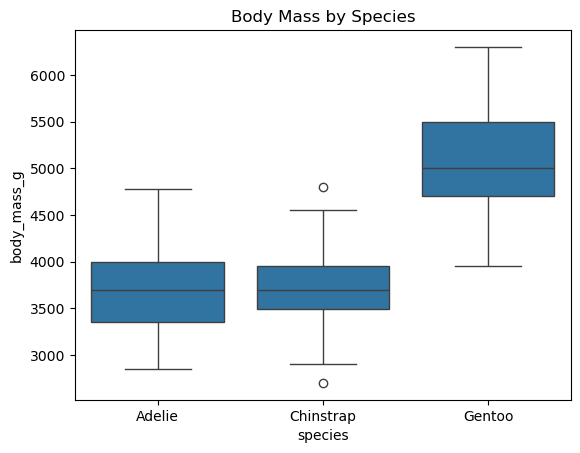

In [9]:
# Distribution plots
plt.figure()
sns.histplot(penguins, x="flipper_length_mm", kde=True)
plt.title("Flipper Length Distribution")
plt.show()

plt.figure()
sns.boxplot(data=penguins, x="species", y="body_mass_g")
plt.title("Body Mass by Species")
plt.show()

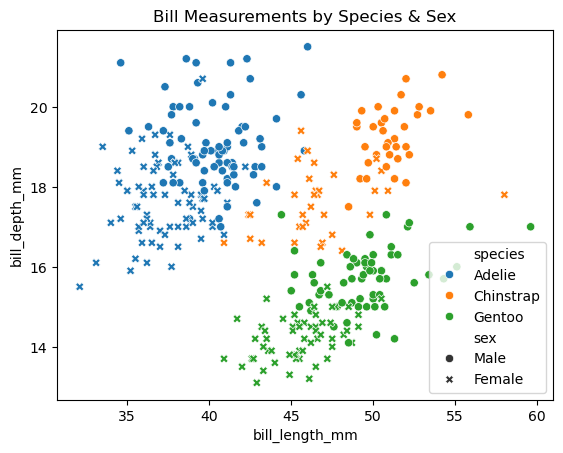

In [10]:
# Scatter / relationship plots
plt.figure()
sns.scatterplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    style="sex"
)
plt.title("Bill Measurements by Species & Sex")
plt.show()

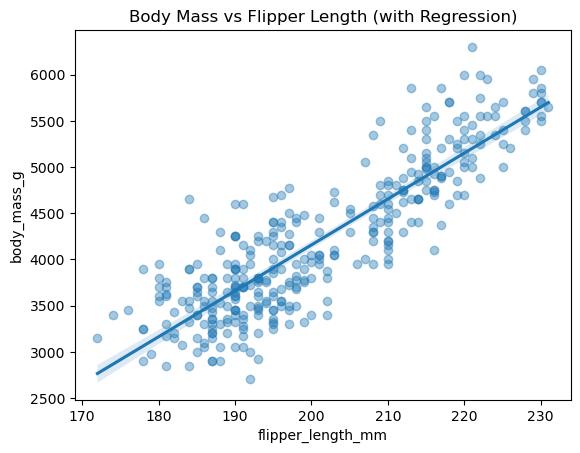

In [11]:
# Regression plot
plt.figure()
sns.regplot(
    data=penguins,
    x="flipper_length_mm",
    y="body_mass_g",
    scatter_kws={"alpha":0.4}
)
plt.title("Body Mass vs Flipper Length (with Regression)")
plt.show()

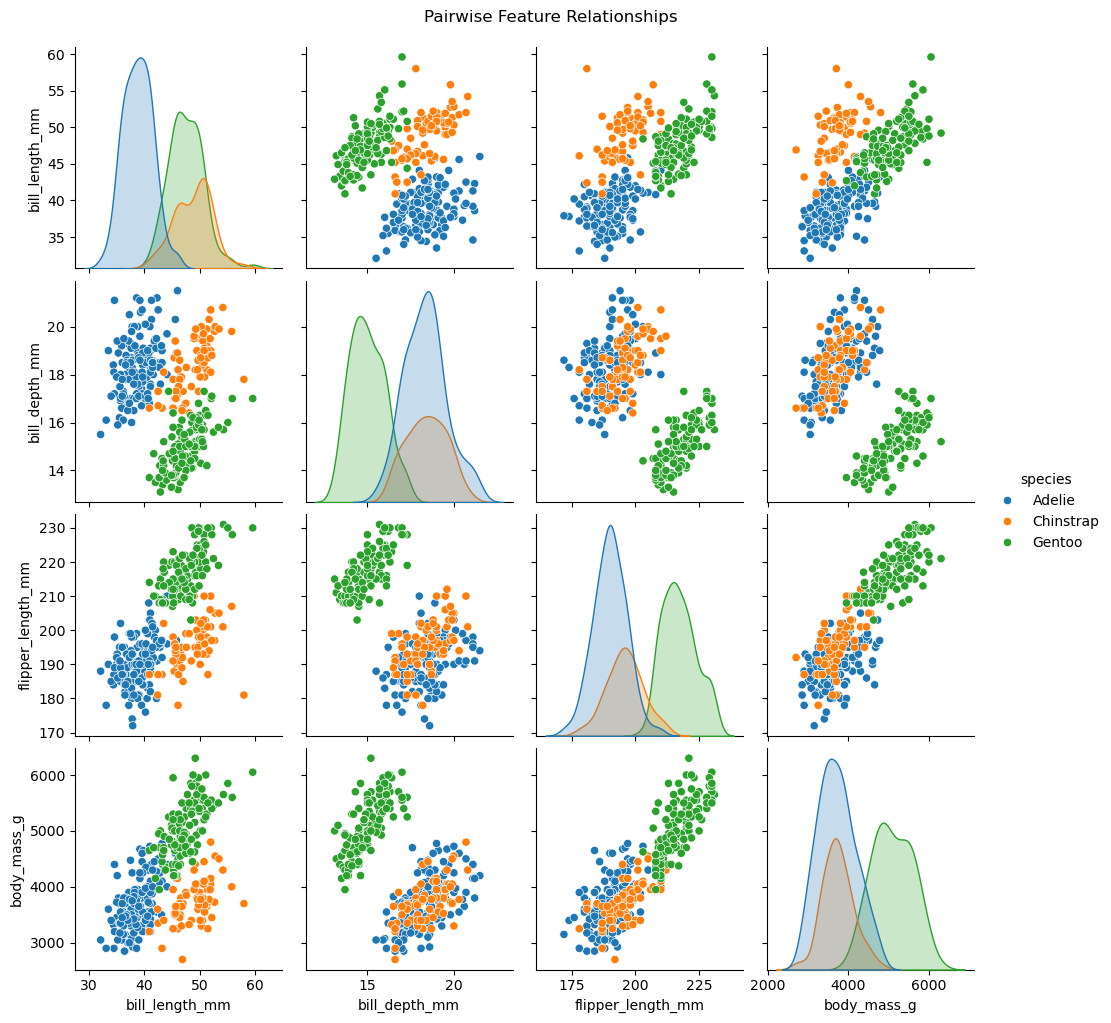

In [12]:
# Pairplot
sns.pairplot(
    penguins.dropna(),
    vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"],
    hue="species"
)
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

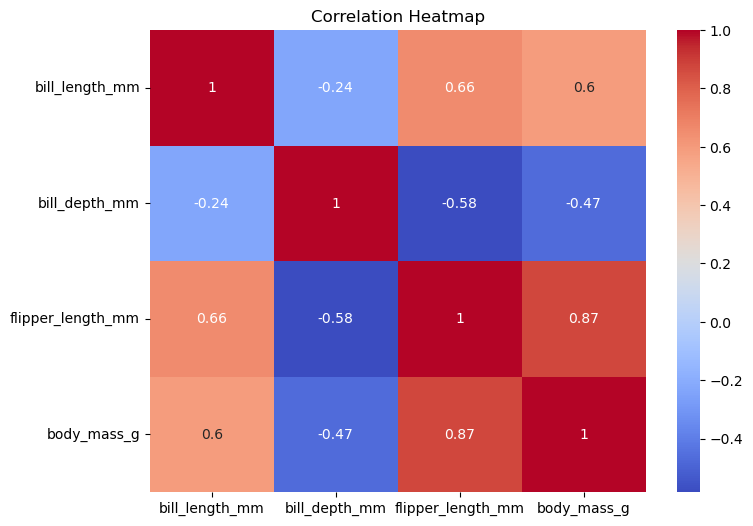

In [13]:
# Heatmap / correlation matrix
corr = penguins.select_dtypes("number").corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

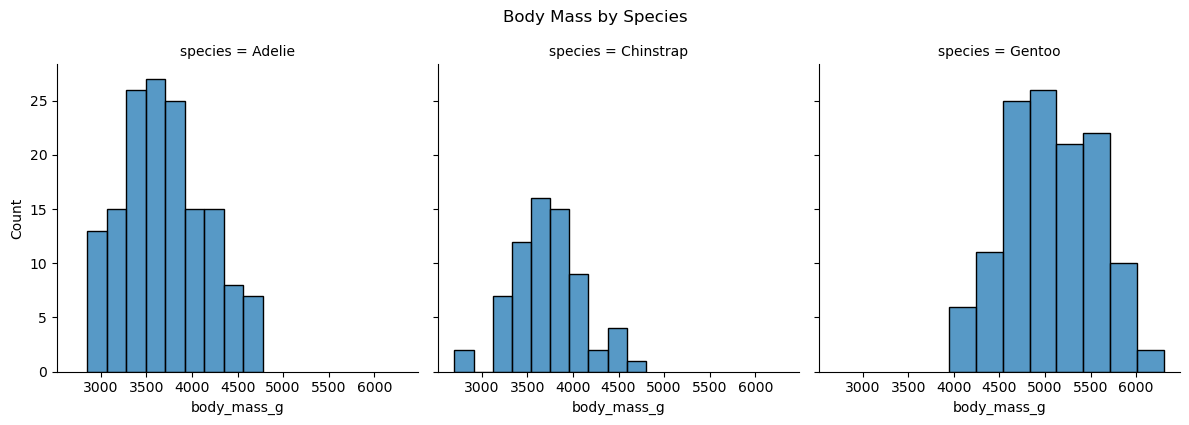

In [14]:
# FacetGrid example
g = sns.FacetGrid(penguins, col="species", height=4)
g.map(sns.histplot, "body_mass_g")
g.fig.suptitle("Body Mass by Species", y=1.05)
plt.show()